Ridge regression
---

Exercise - Basic feature engineering for the house prices data
---

> **Exercise**: 
- (A) load the house prices data from `house-prices.csv` 
- (B) plot the distribution of the continuous variables using histograms: you should see that many have a skewed one 
- (C) create a `preprocess(df)` function which performs 
- (C.1) one-hot encoding 
- (C.2) fill missing values 
- (C.3) apply a **log-transform** to every continuous feature and 
- (C.4) add their **polynomial features** of degree 2, 3 and 0.5 (square root). Finally 
- (D) create the X/y numpy arrays - use the `np.log10()` of the sale price as the target variable.

**Hint**: The logarithm of zero doesn't exist, so we have to make sure that there are no zero values in the continuous columns when applying the log-transform. To achieve this, we can use `np.log(x+1)` (or simply `np.log1p(x)` which is equivalent) which will leave zero values untransformed i.e. `log(1)=0`

In [104]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
# (A) Load the data
import os
data_df = pd.read_csv(os.path.join('data', 'house-prices.csv'))
data_df.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
5,1256,535375160,50,RL,45.0,7506,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,114000
6,2637,902100130,70,RM,57.0,9906,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Family,107000
7,724,902405100,50,RM,98.0,8820,Pave,NaN,Reg,Lvl,...,0,NaN,MnWw,NaN,0,9,2009,WD,Normal,124900
8,2320,527108040,60,RL,72.0,10463,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239900
9,1149,531452140,120,RL,55.0,7892,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,153900


In [57]:
data_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [105]:
# Continuous features from the documentation
continuous = [
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
    'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

In [106]:
data_continuous = data_df[continuous]
data_continuous.shape

(2430, 19)

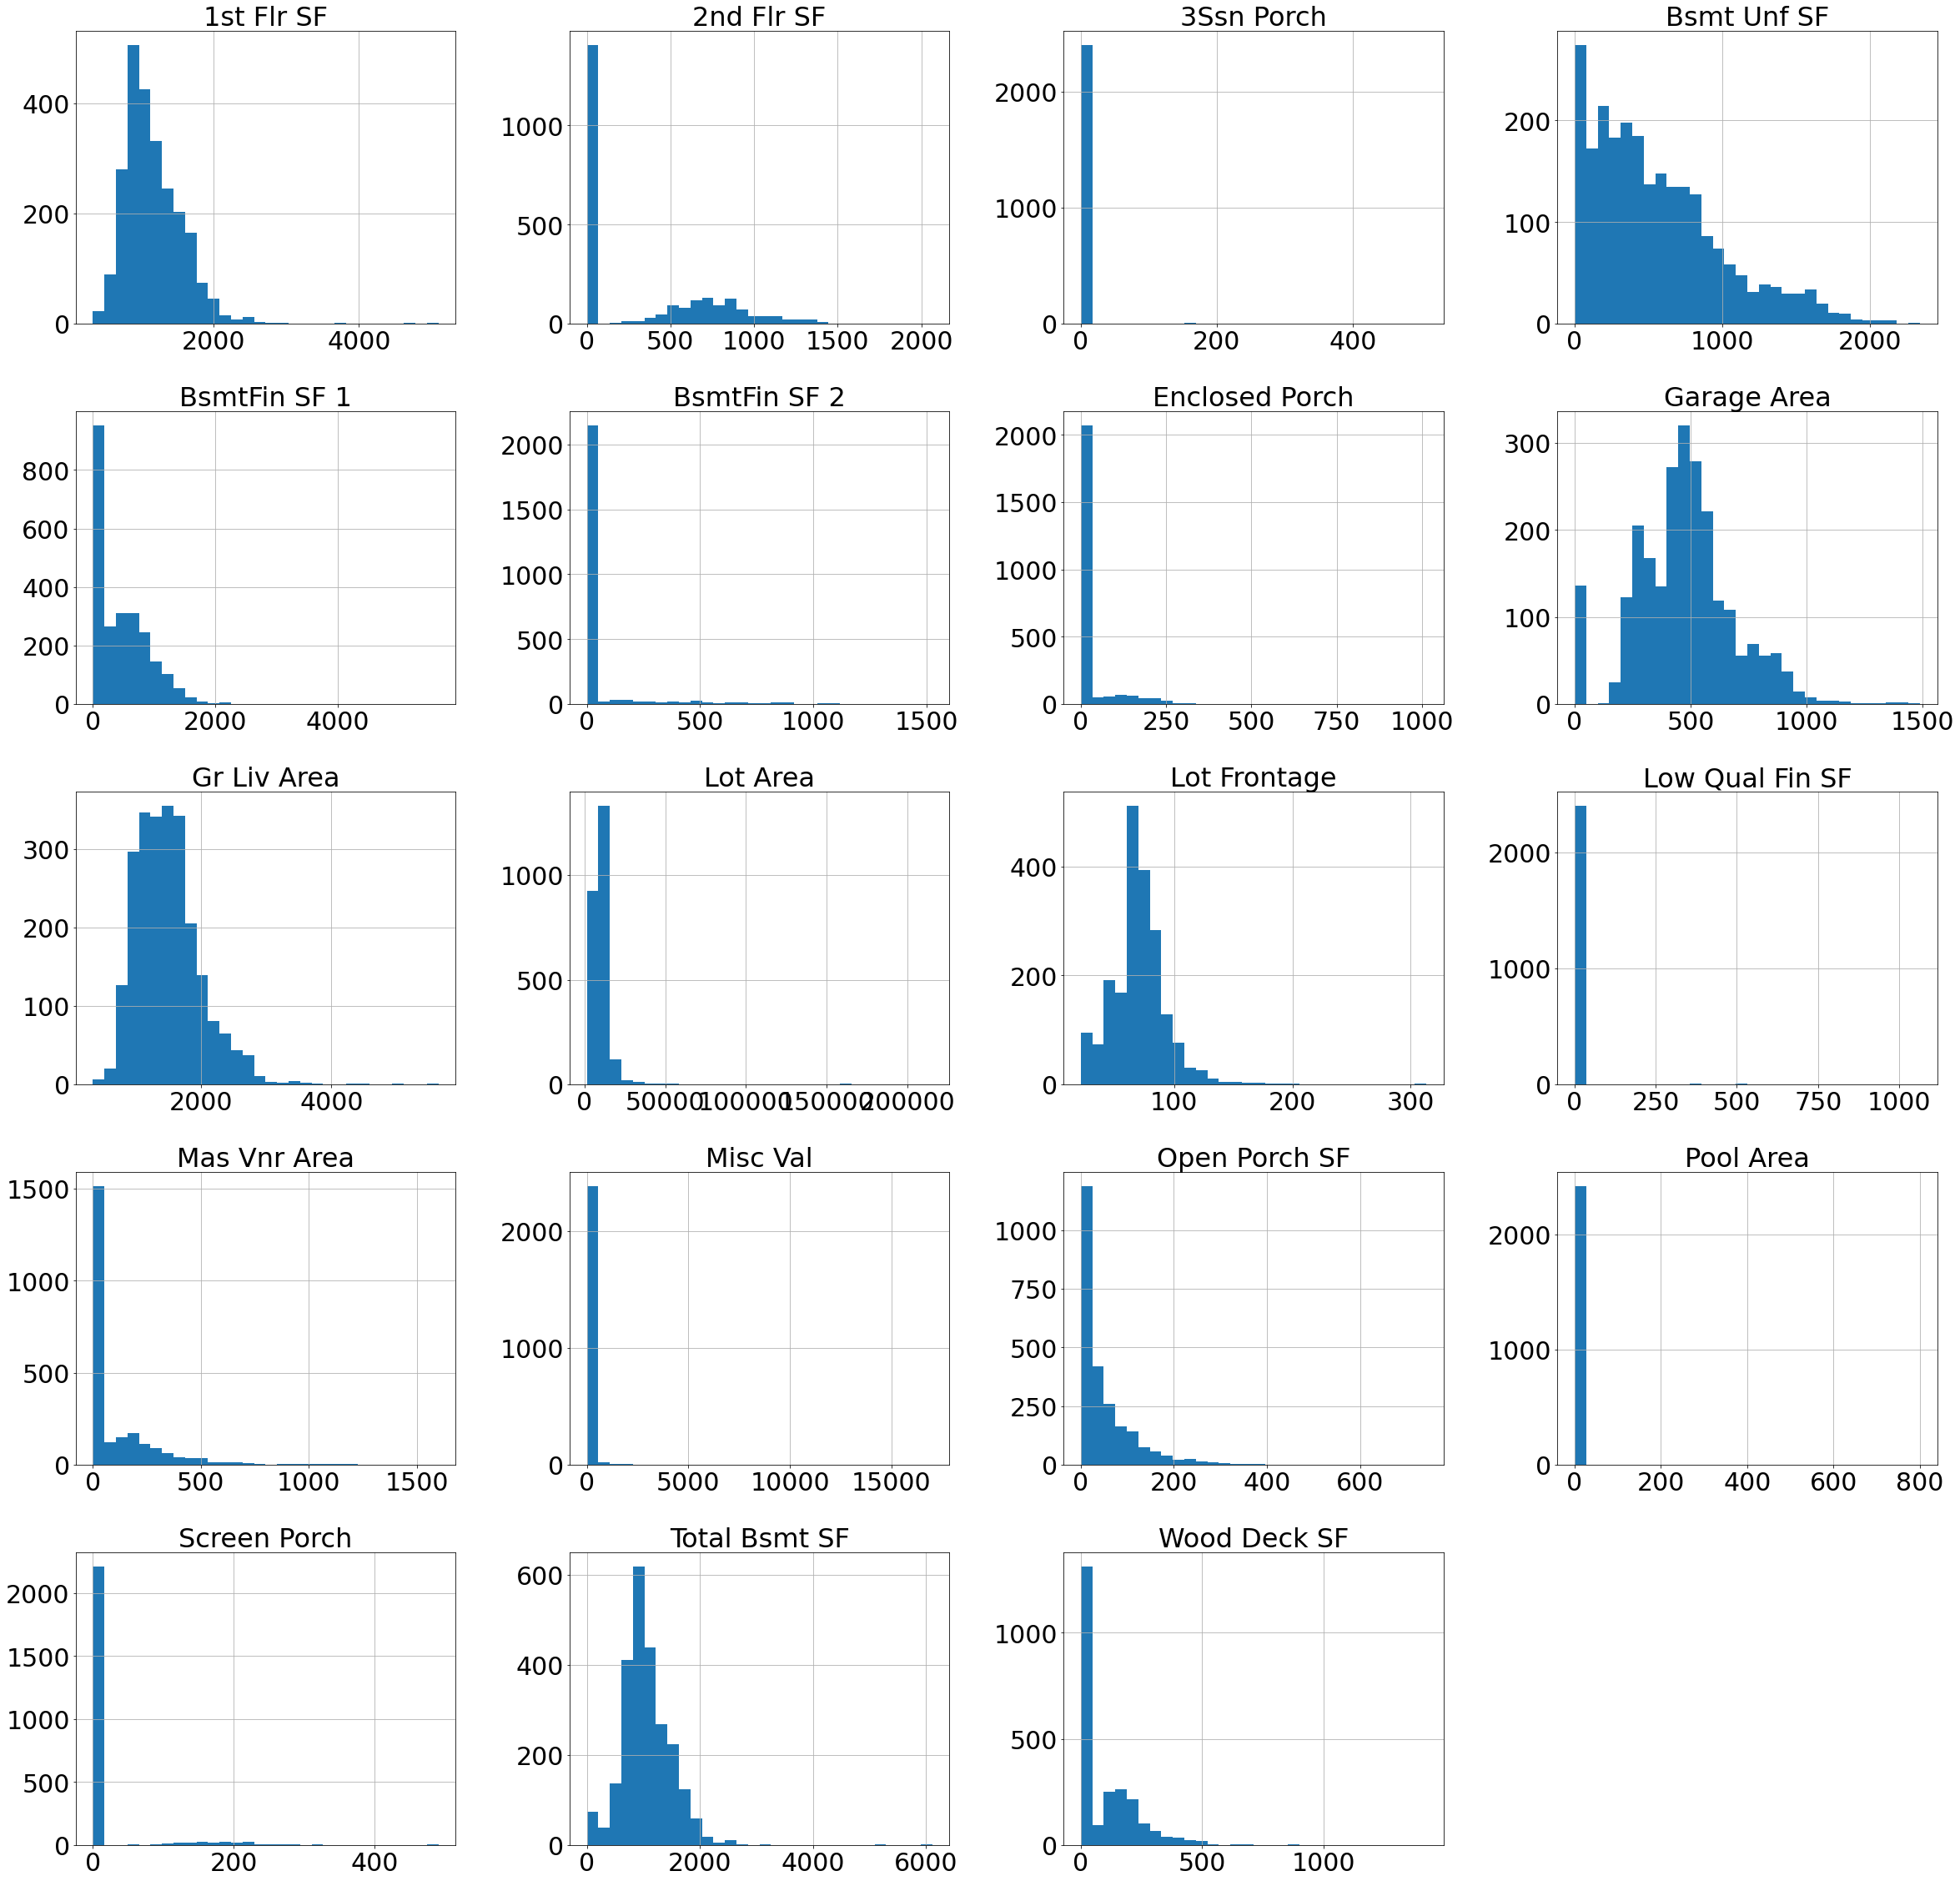

In [107]:
# (B) Plot the distribution of the continuous variables using histograms
import matplotlib
params = {
          'xtick.labelsize':'30',
          'ytick.labelsize':'30'}
matplotlib.rcParams.update(params)
fig = data_continuous.hist(figsize = (40,40), layout = (5,4), bins = 30)
[x.title.set_size(32) for x in fig.ravel()]


# to prevent titles from overlapping
# plt.tight_layout()
plt.show()

Another implementation

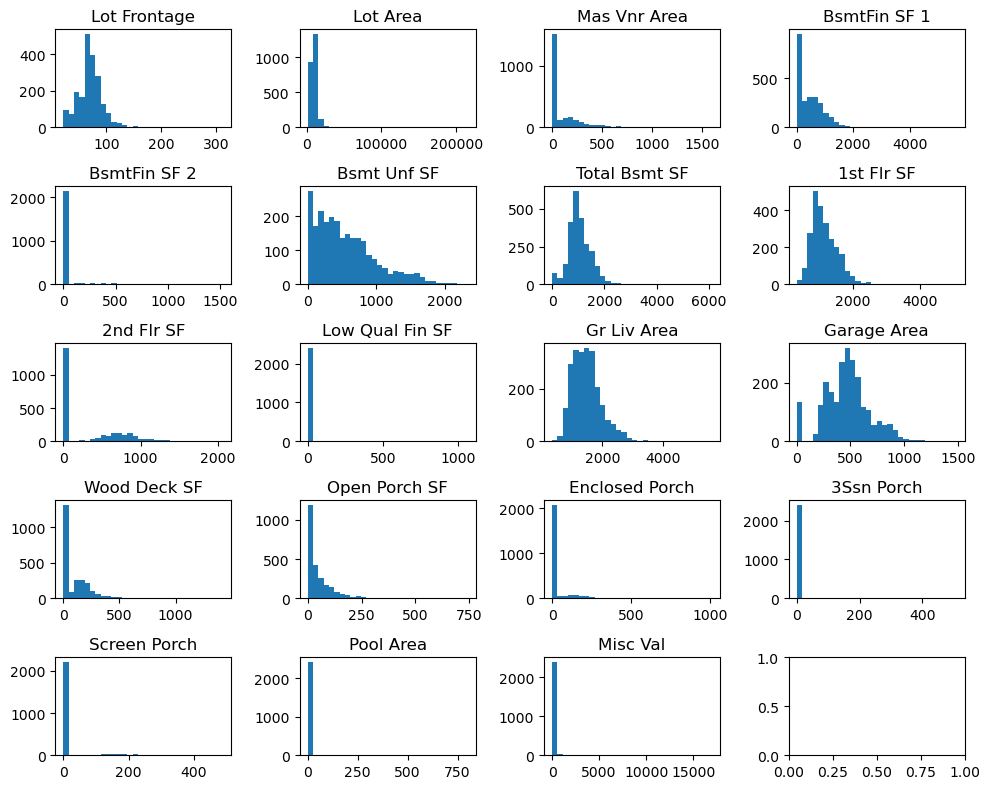

In [108]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)  # to revert to default settings
# (B) A quick look at the distribution of the variables
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(10, 8))

for c, ax in zip(continuous, axes.ravel()):
    ax.hist(data_df[c].dropna(), bins=30)
    ax.set_title(c)

plt.tight_layout() # to avoid overlapping with the labels
plt.show()

In [109]:
data_df.SalePrice.isnull().sum()

0

In [62]:
data_df._get_numeric_data()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,484,528275070,60,NaN,8795,7,5,2000,2000,0.0,...,224,54,0,0,0,0,0,4,2009,236000
1,2586,535305120,20,75.0,10170,6,6,1951,1951,522.0,...,0,0,0,0,0,0,0,6,2006,155000
2,2289,923228250,160,21.0,2001,4,5,1970,1970,80.0,...,0,0,0,0,0,0,0,1,2007,75000
3,142,535152150,20,70.0,10552,5,5,1959,1959,0.0,...,0,38,0,0,0,0,0,4,2010,165500
4,2042,903475060,190,60.0,10120,7,4,1910,1950,0.0,...,0,0,264,0,0,0,0,1,2007,122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,764,904301070,90,60.0,10800,5,5,1987,1988,0.0,...,120,0,0,0,0,0,0,3,2009,179000
2426,836,907126010,20,82.0,12464,5,5,1996,1996,0.0,...,168,0,0,0,0,0,0,11,2009,152000
2427,1654,527353080,60,80.0,11584,7,6,1979,1979,96.0,...,0,88,216,0,0,0,0,11,2007,197000
2428,2608,535402070,80,85.0,13400,5,5,1966,1966,1047.0,...,0,0,0,0,0,0,0,6,2006,159950


In [110]:
# (C) Preprocessing function
def preprocess(df):
    # Work on a copy
    df = df.copy()
    target = df.SalePrice
    
    # no need because there is no NaNs in SalePrice
    # df.drop('SalePrice', axis = 1, inplace = True )
    
    # (C.1) One-hot encoding
    df = pd.get_dummies(df, dummy_na = True)
  #  df = pd.get_dummies(df, dummy_na = True, drop_first = True)
    
    

    
    # (C.2) Fill missing values
   
    continuous = [
    'Lot Frontage', 'Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
    'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
    'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
    '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']    
    
    # df_numerical = df._get_numeric_data()
    
    for c in continuous:
        df[c] = df[c].fillna(df[c].median())
    
    # (C.3) Apply log-transform
    for c in continuous:
        df[c] = np.log10(df[c]+1)
    
    # (C.4) Add polynomial features
    for c in continuous:
        for d in [0.5, 2, 3]:
            name = '{}**{}'.format(c, d)
            df[name] = df[c]**d
        
    
    
    return df

In [44]:
df = data_df
df = df.copy()
target = df.SalePrice
    
    # no need because there is no NaNs in SalePrice
    # df.drop('SalePrice', axis = 1, inplace = True )
    
    # (C.1) One-hot encoding
df = pd.get_dummies(df, dummy_na = True, drop_first = True)

In [46]:
df.shape


(2430, 305)

In [47]:
for c in continuous:
    df[c] = df[c].fillna(df[c].median())

In [48]:
df.shape

(2430, 305)

In [49]:
for c in continuous:
    df[c] = np.log10(df[c]+1)
df.shape

(2430, 305)

In [50]:
for c in continuous:
    for d in [0.5, 2, 3]:
        name = '{}**{}'.format(c, d)
        df[name] = df[c]**d
df.shape

(2430, 362)

In [52]:
preprocessed_df = preprocess(data_df)
preprocessed_df.shape

(2430, 361)

In [111]:


preprocessed_df = preprocess(data_df)
# isn't is better to do:
# preprocessed_df = preprocess(data_df.drop('SalePrice', axis = 1, inplace = True))
preprocessed_df.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,3Ssn Porch**3,Screen Porch**0.5,Screen Porch**2,Screen Porch**3,Pool Area**0.5,Pool Area**2,Pool Area**3,Misc Val**0.5,Misc Val**2,Misc Val**3
0,484,528275070,60,1.838849,3.944285,7,5,2000,2000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2586,535305120,20,1.880814,4.007364,6,6,1951,1951,2.718502,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2289,923228250,160,1.342423,3.301464,4,5,1970,1970,1.908485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,142,535152150,20,1.851258,4.023376,5,5,1959,1959,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2042,903475060,190,1.785330,4.005223,7,4,1910,1950,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
# (D) Create X, y
X = preprocessed_df.drop('SalePrice', axis =1).values
y = np.log10(preprocessed_df.SalePrice).values

In [113]:
X.shape

(2430, 404)

In [114]:
y.shape

(2430,)

Exercise - Tune Ridge regression
---

> **Exercise**: Fit a ridge regression model and tune its alpha value using grid search. Use the train/test set methodology with a 50/50 split. Print the optimal alpha value and the test MSE/MAE scores.

**Hint**: Don't forget to standardize the input data.

We should have splitted the data before the preprocessing!!!!

In [115]:
from sklearn.model_selection import train_test_split


X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, train_size=0.5, test_size=0.5, random_state=0)

In [116]:
print('Train:', X_tr.shape, y_tr.shape)
print('Train:', X_tr.shape, y_tr.shape)

Train: (1215, 404) (1215,)
Train: (1215, 404) (1215,)


### perform Grid Search for the alpha value

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_te_rescaled = scaler.transform(X_te)

In [121]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

gs_results =[]

for alpha in np.logspace(-1, 4, num = 20):

    ridge = Ridge(alpha = alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    y_tr_pred = ridge.predict(X_tr_rescaled)
    y_te_pred = ridge.predict(X_te_rescaled)

    gs_results.append({
        'model': ridge,
        'alpha': alpha,
        'train_mse': MSE(y_tr, y_tr_pred),
        'train_mae': MAE(10**y_tr, 10**y_tr_pred),
        'test_mse': MSE(y_te, y_te_pred),
        'test_mae': MAE(10**y_te, 10**y_te_pred),
    })
    
gs_results = pd.DataFrame(gs_results)  

gs.results.head()
    
#print('Train MSE: {:.4f}'.format(MSE(y_tr, y_tr_pred)))
#print('Test MSE: {:.4f}'.format(MSE(y_te, y_te_pred)))
#print('Train MAE: {:.4f}'.format(MAE(y_tr, y_tr_pred)))
#print('Test MAE: {:.4f}'.format(MAE(y_te, y_te_pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
plt.hist(ridge.coef_, bins = 50)
plt.xlabel('coefficients')
plt.show()